# Preprocessing


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
# I saved my data in a fold named "data" in my Google drive
# Then I load the data by the following functions

from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/My Drive/aws-ec2.tar/"

# data = pd.read_csv(data_path+"data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz")


# import lzma

# # Define the path to your .xz file in Google Drive
# file_path = "/content/gdrive/My Drive/aws-ec2.tar/data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz"

# # Open the .xz file for reading
# with lzma.open(file_path, 'rb') as file:
#     # Read the content of the file
#     file_content = file.read()

# # Now you can work with the file content as needed
# # For example, you can print it:
# print(file_content)

# # Decode the content assuming it's in UTF-8 encoding
# decoded_content = file_content.decode('utf-8')

# # Now you can print the decoded content
# with open('output.txt', 'w', encoding='utf-8') as output_file:
#     output_file.write(decoded_content)

Mounted at /content/gdrive


In [ ]:
import lzma

# Define the path to your .xz file in Google Drive
file_path = "/content/gdrive/My Drive/aws-ec2.tar/data.ap-northeast-1.2021-01-08T14:52:59-08:00.xz"

# Define the chunk size (adjust as needed)
chunk_size = 100000  # 100 KB

# Open the .xz file for reading
with lzma.open(file_path, 'rb') as file:
    with open('output.txt', 'w', encoding='utf-8') as output_file:
        while True:
            chunk = file.read(chunk_size)
            if not chunk:
                break
            decoded_chunk = chunk.decode('utf-8')
            output_file.write(decoded_chunk)

print("Data has been written to 'output.txt'")

Data has been written to 'output.txt'


In [6]:
import lzma
import os

# Directory where the .xz files are located
directory_path = "/content/gdrive/My Drive/ExcelExtract/"

# Define the common name of the files
common_name = "us-west-1"

# Define the output file path
output_file_path = "output-us-west-1.txt"

# Define the chunk size (adjust as needed)
chunk_size = 100000  # 100 KB

# Open the output file for writing
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # List files in the directory
    files = os.listdir(directory_path)

    # Iterate through the files
    for file_name in files:
        if common_name in file_name and file_name.endswith('.xz'):
            # Create the full file path
            file_path = os.path.join(directory_path, file_name)

            # Open the .xz file for reading
            with lzma.open(file_path, 'rb') as file:
                while True:
                    chunk = file.read(chunk_size)
                    if not chunk:
                        break
                    decoded_chunk = chunk.decode('utf-8')
                    output_file.write(decoded_chunk)

print("Merged data from multiple files into 'output-us-west-1.txt'")


Merged data from multiple files into 'output-us-west-1.txt'


In [8]:
pwd

'/content'

In [11]:
import os

# Directory where the .txt files are located (Colab local runtime directory)
directory_path = "/content/"

# List of input file names (adjust these based on your actual file names)
input_files = ["output-eu-north-1.txt", "output-us-west-1.txt", "output.txt"]

# Output file path
output_file_path = "/content/combined_output.txt"

# Open the output file for writing
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # Iterate through the input files and concatenate their contents
    for file_name in input_files:
        file_path = os.path.join(directory_path, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as input_file:
                content = input_file.read()
                output_file.write(content)

print("Combined data from multiple files into 'combined_output.txt'")


Combined data from multiple files into 'combined_output.txt'


In [13]:
import pandas as pd

# Input file path (the merged .txt file)
input_file_path = "/content/output.txt"

# Output Excel file path
output_excel_path = "/content/output.xlsx"

# Read the text file into a pandas DataFrame (assuming one column of data)
df = pd.read_csv(input_file_path, delimiter="\t", header=None, names=["Data"])

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Converted '{input_file_path}' to Excel file: '{output_excel_path}'")


ValueError: ignored

# Analytics on ap-northeast-1 data

In [30]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame without headers
df = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df.reset_index(drop=True, inplace=True)
print (df.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



                 Spot Price DateandTime  \
0  2021-11-03T00:06:13-0700  t3.2xlarge   
1  2021-11-03T00:06:13-0700  t3.2xlarge   
2  2021-11-03T00:06:13-0700  t3.2xlarge   
3  2021-11-03T00:06:13-0700  t3.2xlarge   
4  2021-11-03T00:06:13-0700  t3.2xlarge   
5  2021-11-03T00:06:13-0700  t3.2xlarge   
6  2021-11-03T00:03:07-0700  t3.2xlarge   
7  2021-11-03T00:03:07-0700  t3.2xlarge   
8  2021-11-03T00:01:32-0700  m5.4xlarge   
9  2021-11-03T00:01:32-0700  m5.4xlarge   

                            Instancetype ProductDescription  
0  Red Hat Enterprise Linux (Amazon VPC)         us-west-1a  
1  Red Hat Enterprise Linux (Amazon VPC)         us-west-1b  
2                SUSE Linux (Amazon VPC)         us-west-1a  
3                SUSE Linux (Amazon VPC)         us-west-1b  
4                Linux/UNIX (Amazon VPC)         us-west-1a  
5                Linux/UNIX (Amazon VPC)         us-west-1b  
6                   Windows (Amazon VPC)         us-west-1a  
7                   Windows (A

In [7]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Initialize an empty list to store dataframes
dfs = []

# Initialize variables to store data
spot_prices = []
dates = []
times = []
instance_types = []
product_descriptions = []

# Function to process each line
def process_line(line):
    parts = line.strip().split('\t')
    if len(parts) == 6:
        spot_price, _, datetime, instance_type, product_description, region = parts
        date, time = datetime.split("T")
        date = date.split("-")[0]  # Extract the year-month-day
        return spot_price, date, time, instance_type, product_description
    else:
        return None

# Read and process the data line by line
with open(data_path, 'r') as file:
    for line in file:
        data = process_line(line)
        if data is not None:
            spot_price, date, time, instance_type, product_description = data
            spot_prices.append(spot_price)
            dates.append(date)
            times.append(time)
            instance_types.append(instance_type)
            product_descriptions.append(product_description)

# Create a DataFrame from the processed data
df = pd.DataFrame({
    "Spot Price": spot_prices,
    "Date": dates,
    "Time": times,
    "Instance Type": instance_types,
    "Product Description": product_descriptions
})

# Print the modified DataFrame
print((df.head(10)).to_string(index=False))


       Spot Price Date          Time Instance Type                   Product Description
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge               SUSE Linux (Amazon VPC)


In [63]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df["Date"] = df["DateandTime"].str.split("T").str.get(0)
df["Time"] = df["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df['Spot Price'][:5])


0    0.249
1    0.249
2    0.269
3    0.269
4    0.119
Name: Spot Price, dtype: float64


In [36]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
    'Instance Type': df['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('t3.2xlarge', 'm5.4xlarge', 'r5.2xlarge',…

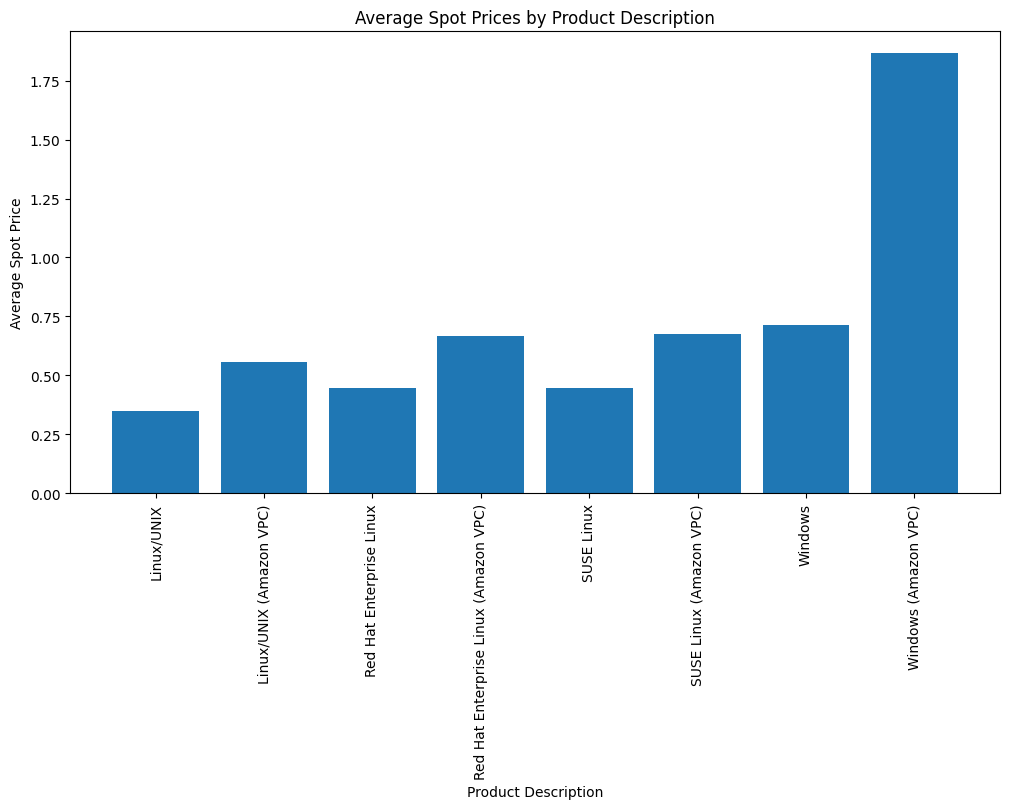

In [23]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

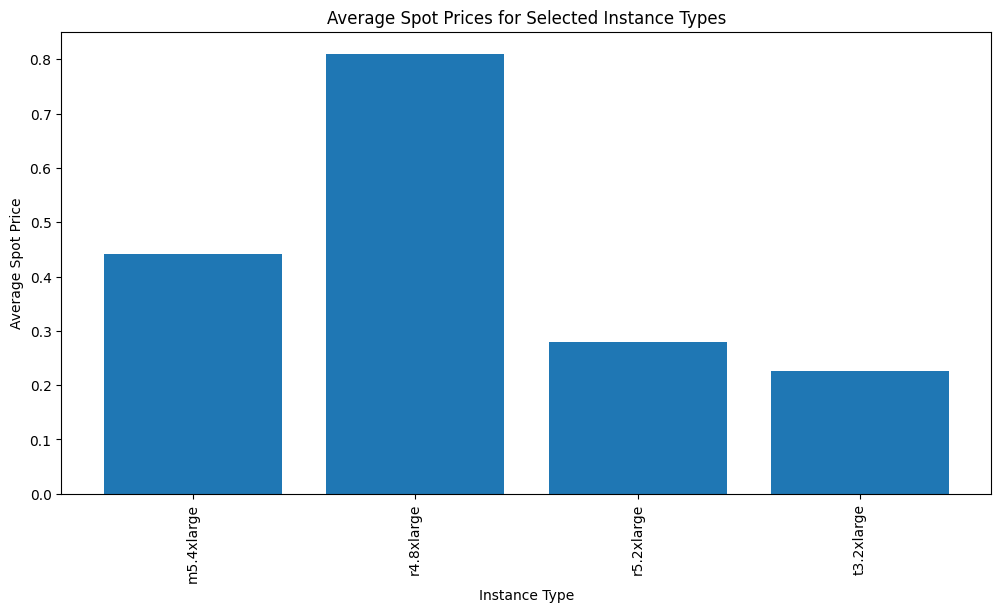

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df['Instance Type'],
    'Spot Price': df['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


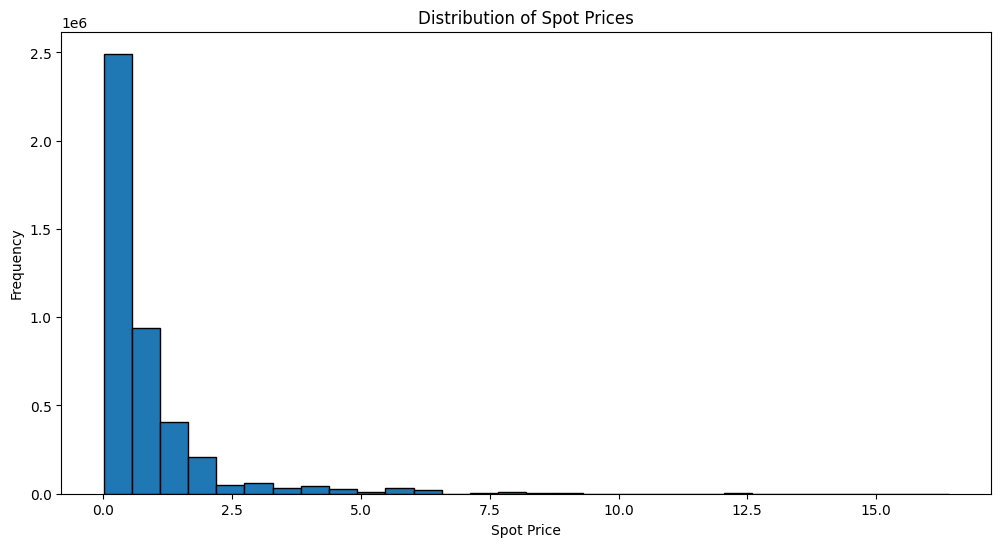

In [25]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


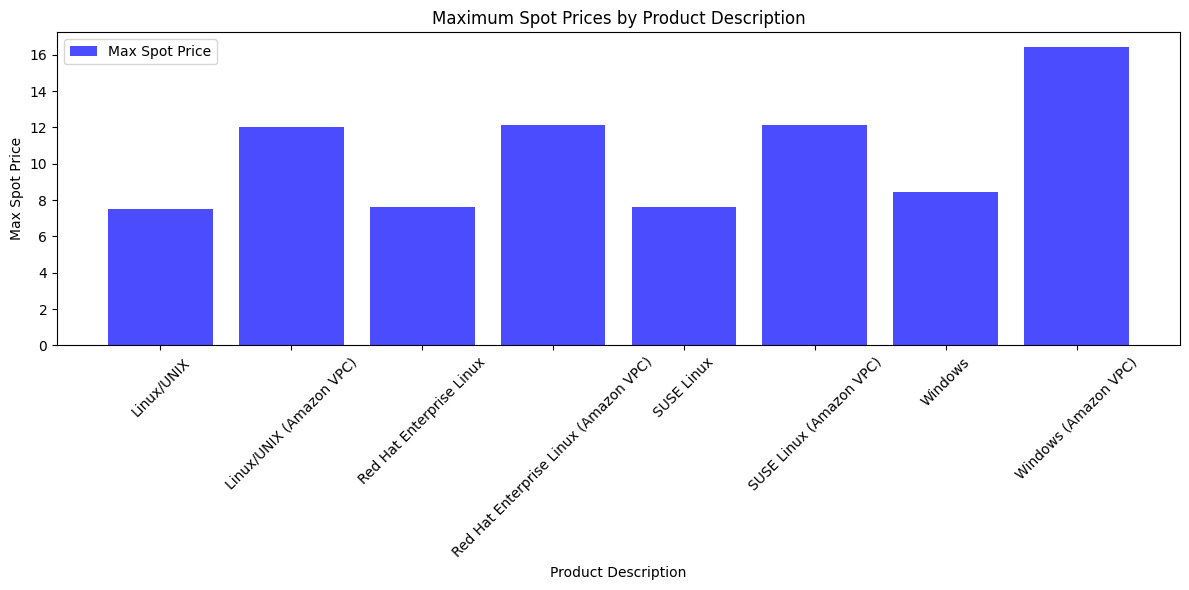

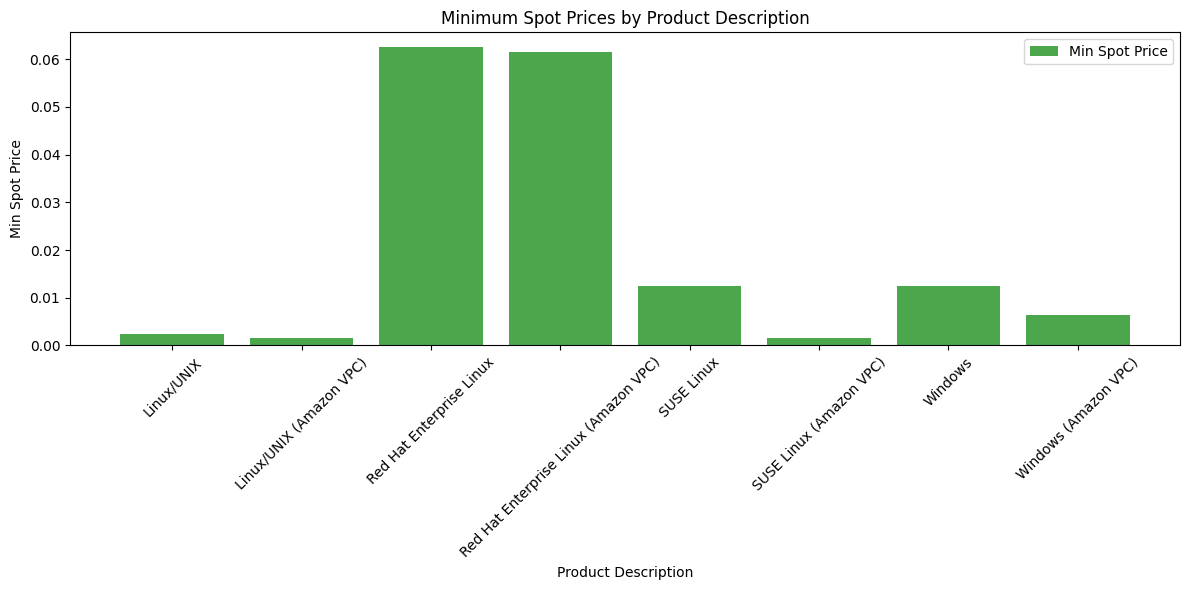

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df['Product Description'],
    'Spot Price': df['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()


In [76]:
print(product_price_stats)


                     Product Description     max     min
0                             Linux/UNIX   7.502  0.0025
1                Linux/UNIX (Amazon VPC)  12.000  0.0015
2               Red Hat Enterprise Linux   7.632  0.0625
3  Red Hat Enterprise Linux (Amazon VPC)  12.130  0.0615
4                             SUSE Linux   7.602  0.0125
5                SUSE Linux (Amazon VPC)  12.150  0.0015
6                                Windows   8.464  0.0125
7                   Windows (Amazon VPC)  16.416  0.0063


# Analytics on eu-north-1 data

In [83]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-eu-north-1.txt"

# Read the data into a Pandas DataFrame without headers
df = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df.reset_index(drop=True, inplace=True)
print (df.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



                 Spot Price  DateandTime              Instancetype  \
0  2021-11-03T23:33:59-0700  r6g.8xlarge  Red Hat Enterprise Linux   
1  2021-11-03T23:33:59-0700  r6g.8xlarge                SUSE Linux   
2  2021-11-03T23:33:59-0700  r6g.8xlarge                Linux/UNIX   
3  2021-11-03T23:26:29-0700   g4dn.metal                   Windows   
4  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
5  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
6  2021-11-03T23:13:14-0700  r5.16xlarge                   Windows   
7  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   
8  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   
9  2021-11-03T23:11:02-0700   c5.9xlarge  Red Hat Enterprise Linux   

  ProductDescription  
0        eu-north-1b  
1        eu-north-1b  
2        eu-north-1b  
3        eu-north-1a  
4        eu-north-1c  
5        eu-north-1b  
6        eu-north-1a  
7        eu-north-1c  
8        eu-north-1b  

In [84]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Initialize an empty list to store dataframes
dfs = []

# Initialize variables to store data
spot_prices = []
dates = []
times = []
instance_types = []
product_descriptions = []

# Function to process each line
def process_line(line):
    parts = line.strip().split('\t')
    if len(parts) == 6:
        spot_price, _, datetime, instance_type, product_description, region = parts
        date, time = datetime.split("T")
        date = date.split("-")[0]  # Extract the year-month-day
        return spot_price, date, time, instance_type, product_description
    else:
        return None

# Read and process the data line by line
with open(data_path, 'r') as file:
    for line in file:
        data = process_line(line)
        if data is not None:
            spot_price, date, time, instance_type, product_description = data
            spot_prices.append(spot_price)
            dates.append(date)
            times.append(time)
            instance_types.append(instance_type)
            product_descriptions.append(product_description)

# Create a DataFrame from the processed data
df = pd.DataFrame({
    "Spot Price": spot_prices,
    "Date": dates,
    "Time": times,
    "Instance Type": instance_types,
    "Product Description": product_descriptions
})

# Print the modified DataFrame
print((df.head(10)).to_string(index=False))


       Spot Price Date          Time Instance Type                   Product Description
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge               SUSE Linux (Amazon VPC)


In [85]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df["Date"] = df["DateandTime"].str.split("T").str.get(0)
df["Time"] = df["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df['Spot Price'][:5])


0    0.249
1    0.249
2    0.269
3    0.269
4    0.119
Name: Spot Price, dtype: float64


In [86]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
    'Instance Type': df['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('t3.2xlarge', 'm5.4xlarge', 'r5.2xlarge',…

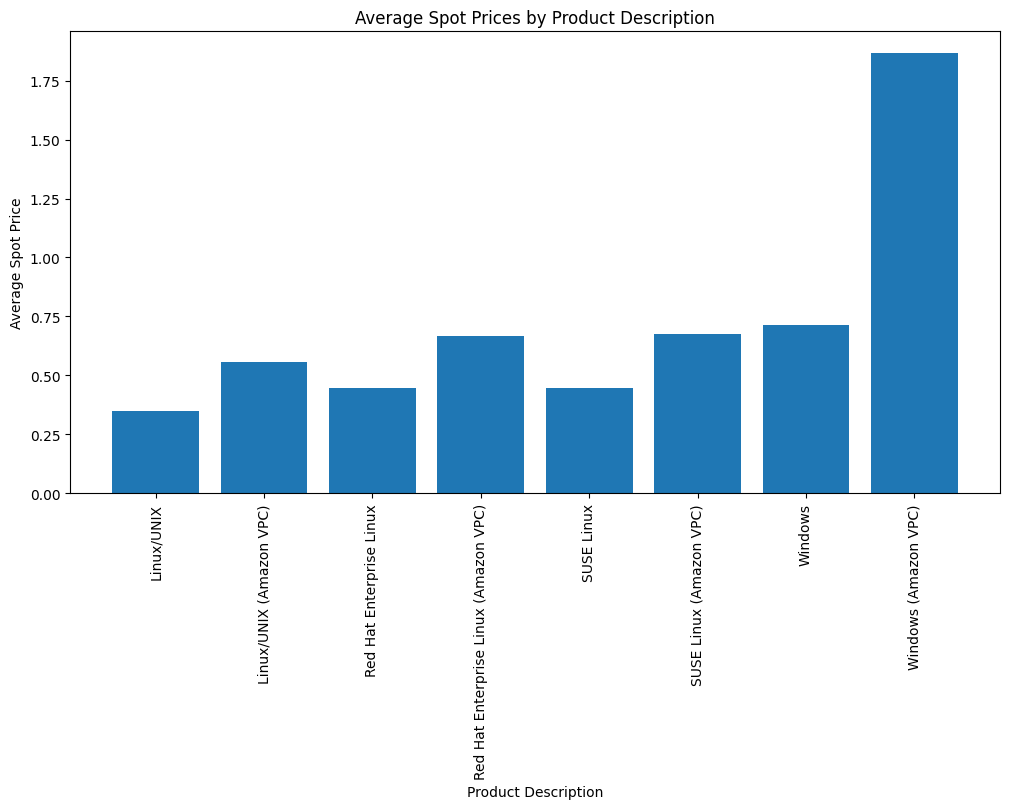

In [88]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

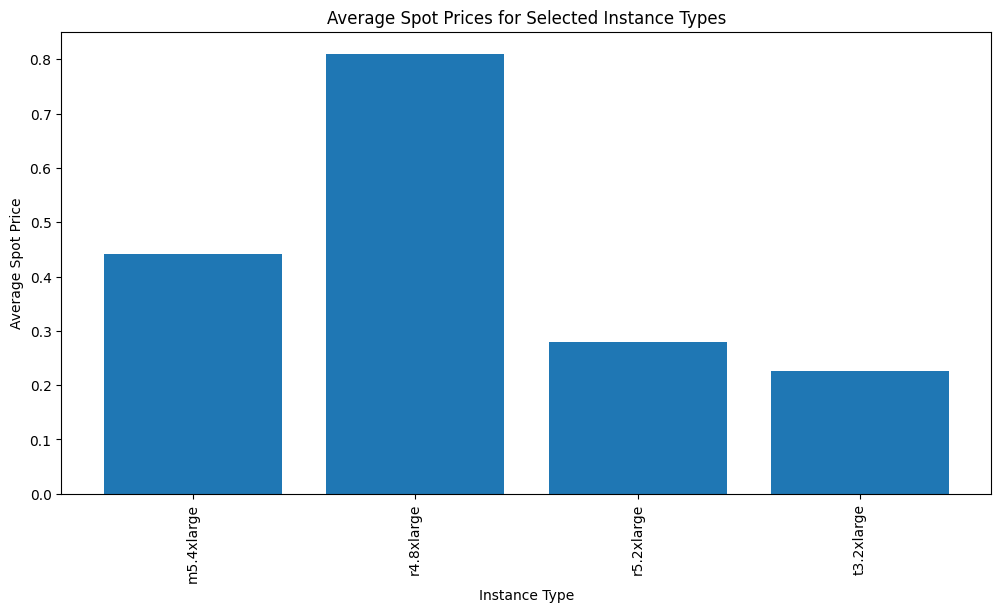

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df['Instance Type'],
    'Spot Price': df['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


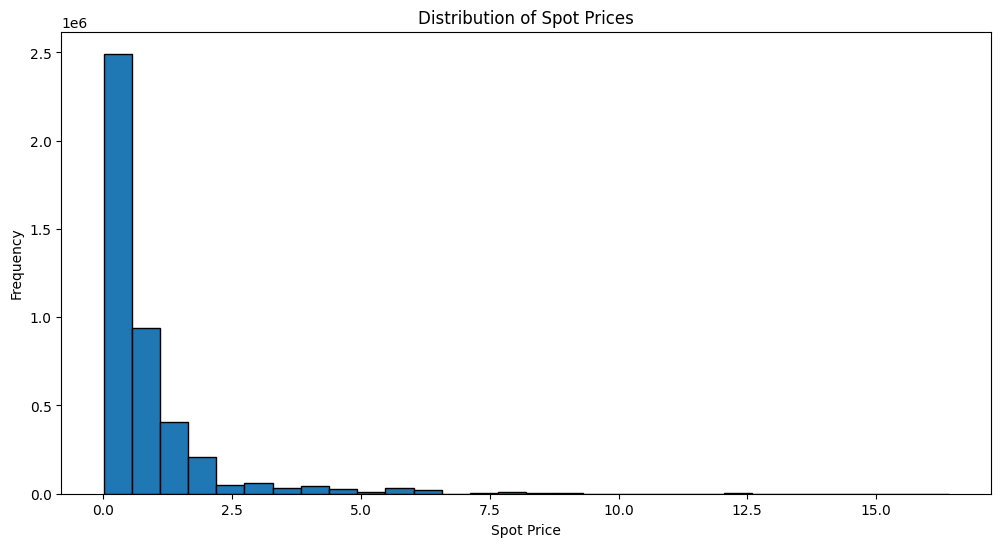

In [90]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


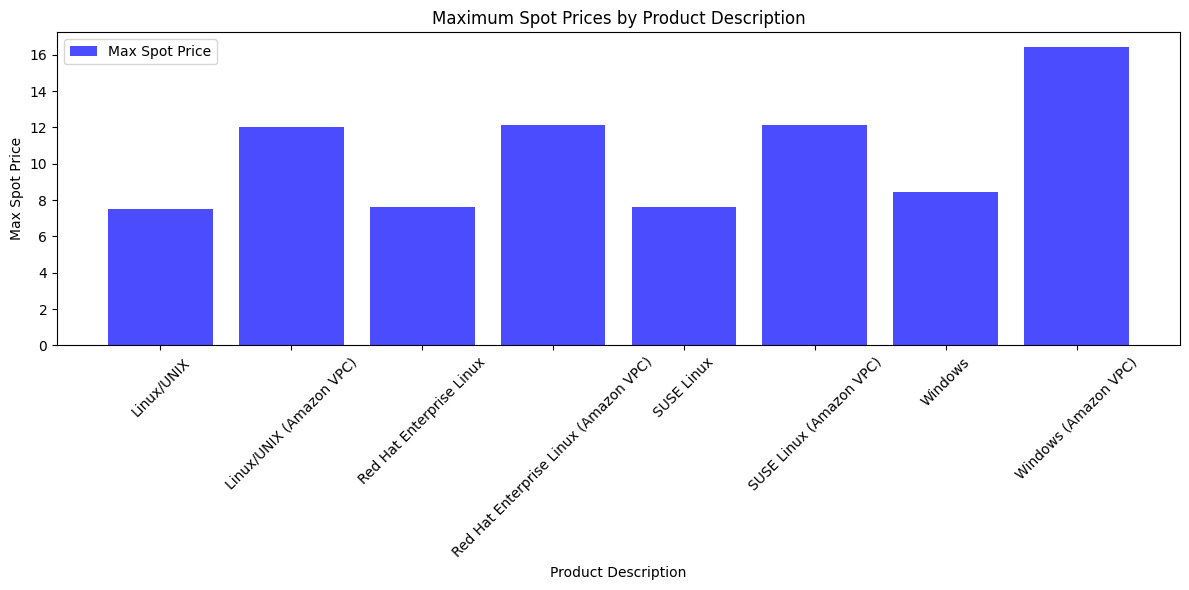

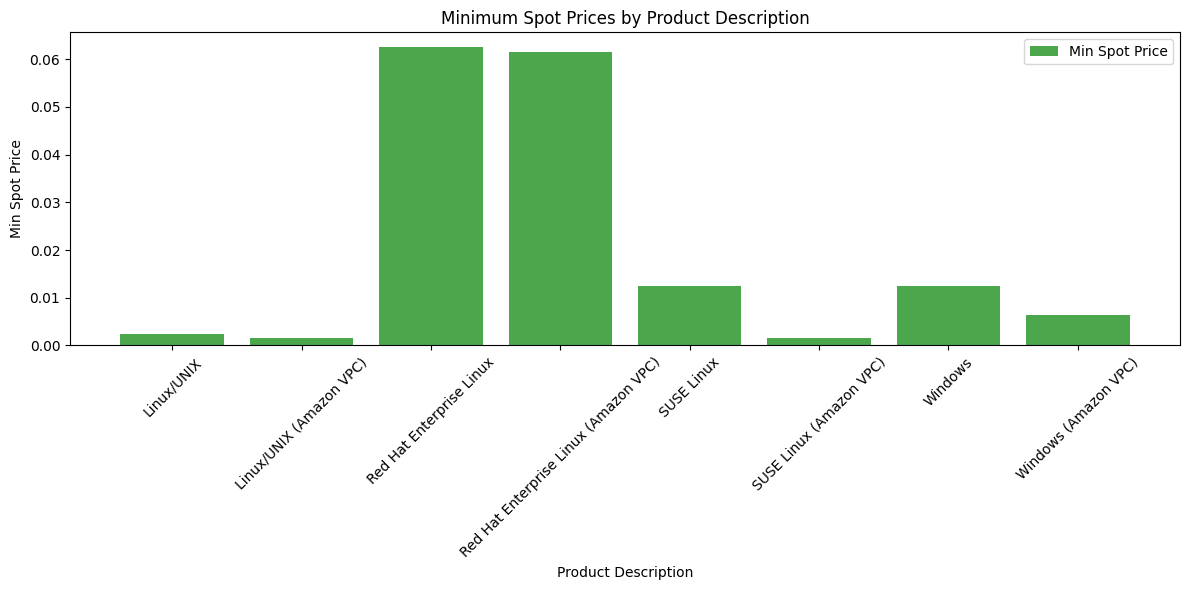

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df['Product Description'],
    'Spot Price': df['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()


# Analytics on us-west-1 data

In [92]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame without headers
df = pd.read_csv(data_path, delimiter="\t", header=None, names=["Spot Price", "DateandTime", "Instancetype", "ProductDescription"])
df.reset_index(drop=True, inplace=True)
print (df.head(10))
# Remove the first column (assuming it's the 0th column)
# df = df.iloc[:, 1:]



                 Spot Price DateandTime  \
0  2021-11-03T00:06:13-0700  t3.2xlarge   
1  2021-11-03T00:06:13-0700  t3.2xlarge   
2  2021-11-03T00:06:13-0700  t3.2xlarge   
3  2021-11-03T00:06:13-0700  t3.2xlarge   
4  2021-11-03T00:06:13-0700  t3.2xlarge   
5  2021-11-03T00:06:13-0700  t3.2xlarge   
6  2021-11-03T00:03:07-0700  t3.2xlarge   
7  2021-11-03T00:03:07-0700  t3.2xlarge   
8  2021-11-03T00:01:32-0700  m5.4xlarge   
9  2021-11-03T00:01:32-0700  m5.4xlarge   

                            Instancetype ProductDescription  
0  Red Hat Enterprise Linux (Amazon VPC)         us-west-1a  
1  Red Hat Enterprise Linux (Amazon VPC)         us-west-1b  
2                SUSE Linux (Amazon VPC)         us-west-1a  
3                SUSE Linux (Amazon VPC)         us-west-1b  
4                Linux/UNIX (Amazon VPC)         us-west-1a  
5                Linux/UNIX (Amazon VPC)         us-west-1b  
6                   Windows (Amazon VPC)         us-west-1a  
7                   Windows (A

In [93]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Initialize an empty list to store dataframes
dfs = []

# Initialize variables to store data
spot_prices = []
dates = []
times = []
instance_types = []
product_descriptions = []

# Function to process each line
def process_line(line):
    parts = line.strip().split('\t')
    if len(parts) == 6:
        spot_price, _, datetime, instance_type, product_description, region = parts
        date, time = datetime.split("T")
        date = date.split("-")[0]  # Extract the year-month-day
        return spot_price, date, time, instance_type, product_description
    else:
        return None

# Read and process the data line by line
with open(data_path, 'r') as file:
    for line in file:
        data = process_line(line)
        if data is not None:
            spot_price, date, time, instance_type, product_description = data
            spot_prices.append(spot_price)
            dates.append(date)
            times.append(time)
            instance_types.append(instance_type)
            product_descriptions.append(product_description)

# Create a DataFrame from the processed data
df = pd.DataFrame({
    "Spot Price": spot_prices,
    "Date": dates,
    "Time": times,
    "Instance Type": instance_types,
    "Product Description": product_descriptions
})

# Print the modified DataFrame
print((df.head(10)).to_string(index=False))


       Spot Price Date          Time Instance Type                   Product Description
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               SUSE Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:06:13-0700    t3.2xlarge               Linux/UNIX (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:03:07-0700    t3.2xlarge                  Windows (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge Red Hat Enterprise Linux (Amazon VPC)
SPOTINSTANCEPRICE 2021 00:01:32-0700    m5.4xlarge               SUSE Linux (Amazon VPC)


In [94]:
import pandas as pd

# Define the path to your .txt file in Google Drive
data_path = "/content/gdrive/My Drive/Spotinstances/output-us-west-1.txt"

# Read the data into a Pandas DataFrame with tab as the delimiter and no headers
df = pd.read_csv(data_path, delimiter="\t", header=None)

# Assuming that your data structure is as follows:
# Column 0: SPOTINSTANCEPRICE
# Column 1: 0.249000 (Spot Price)
# Column 2: 2021-11-03T00:06:13-0700 (DateandTime)
# Column 3: t3.2xlarge (Instance Type)
# Column 4: Red Hat Enterprise Linux (Amazon VPC) (Product Description)
# Column 5: us-west-1a (Region)

# Rename the columns
df.columns = ["Category", "Spot Price", "DateandTime", "Instance Type", "Product Description", "Region"]

# Manually split the "DateandTime" column into "Date" and "Time"
df["Date"] = df["DateandTime"].str.split("T").str.get(0)
df["Time"] = df["DateandTime"].str.split("T").str.get(1).str.split("-").str.get(0)

# Rearrange the columns as per your requirement
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Drop the unwanted columns by selecting the columns you want to keep
df = df[["Spot Price", "Date", "Time", "Instance Type", "Product Description"]]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df['Spot Price'][:5])


0    0.249
1    0.249
2    0.269
3    0.269
4    0.119
Name: Spot Price, dtype: float64


In [95]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
}

df_combined = pd.DataFrame(data)

# Convert the Date column to datetime type
df_combined["Date"] = pd.to_datetime(df_combined["Date"])

# Group by Date and calculate the mean spot price for each date
daily_spot_price = df_combined.groupby('Date')['Spot Price'].mean().reset_index()

# Create an interactive time series plot
fig = px.line(daily_spot_price, x="Date", y="Spot Price", title="Combined Daily Spot Prices Over Time")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Price (Mean)")
fig.show()


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Date': df['Date'],
    'Spot Price': df['Spot Price'],
    'Instance Type': df['Instance Type']
}

df_combined = pd.DataFrame(data)

# Function to plot average spot prices for a specific instance type
def plot_spot_prices(instance_type):
    # Filter the DataFrame for the specified instance type
    filtered_df = df_combined[df_combined['Instance Type'] == instance_type]

    # Group by Date and calculate the mean spot price for each date
    daily_spot_price = filtered_df.groupby('Date')['Spot Price'].mean().reset_index()

    # Create a time series plot for the combined daily spot prices
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spot_price["Date"], daily_spot_price["Spot Price"])
    plt.title(f"Daily Spot Prices for {instance_type} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Spot Price (Mean)")
    plt.grid(True)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create an interact widget for selecting the instance type
@interact(Instance_Type=instance_types)
def choose_instance_type(Instance_Type=instance_types[0]):
    plot_spot_prices(Instance_Type)


interactive(children=(Dropdown(description='Instance_Type', options=('t3.2xlarge', 'm5.4xlarge', 'r5.2xlarge',…

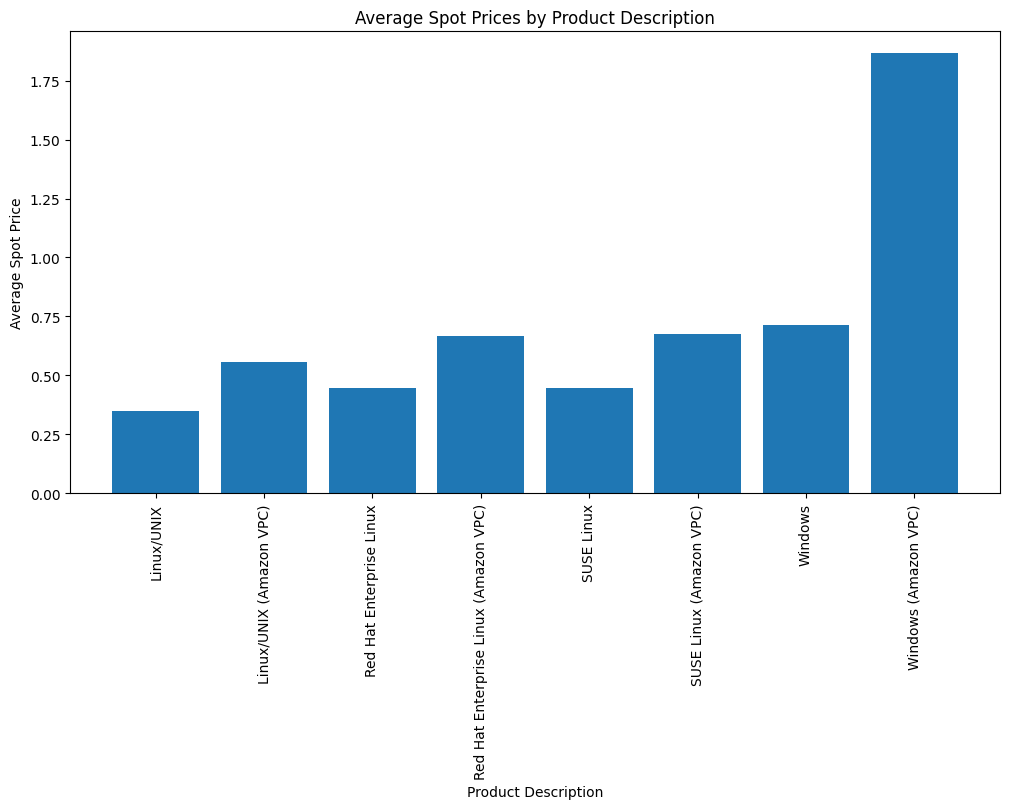

In [97]:
# Group by Product Description and calculate mean spot prices
product_description_prices = df.groupby('Product Description')['Spot Price'].mean().reset_index()

# Create a bar chart to visualize average spot prices by product description
plt.figure(figsize=(12, 6))
plt.bar(product_description_prices['Product Description'], product_description_prices['Spot Price'])
plt.title("Average Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Average Spot Price")
plt.xticks(rotation=90)
plt.show()

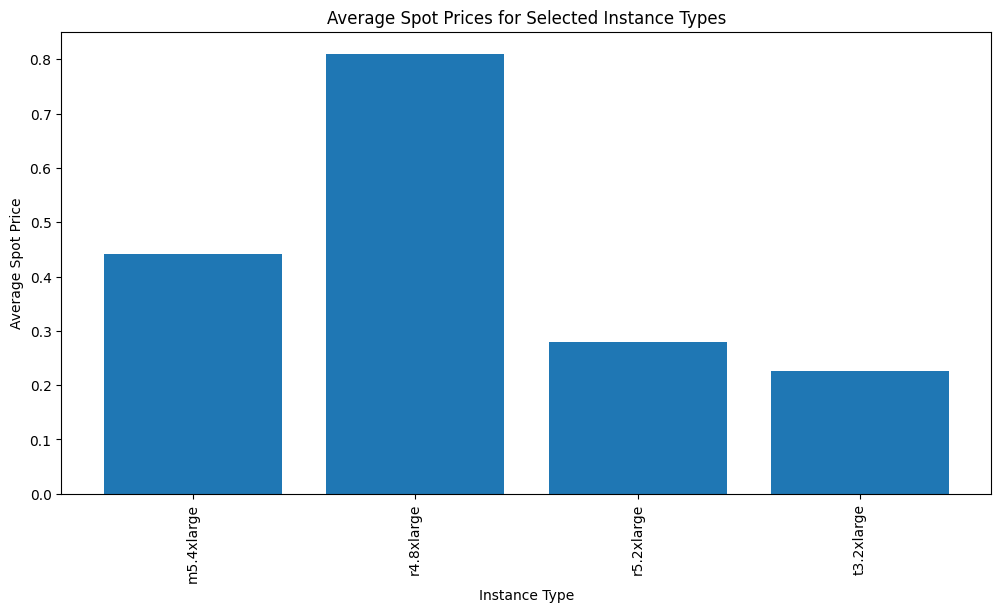

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Instance Type': df['Instance Type'],
    'Spot Price': df['Spot Price']
}

df_combined = pd.DataFrame(data)

# Create a function to clear previous output
def clear_previous_output():
    clear_output(wait=True)

# Function to filter data by instance types and update the bar chart
def filter_and_update_plot(change):
    selected_instance_types = instance_type_dropdown.value
    clear_previous_output()  # Clear previous output

    # Filter the DataFrame for the selected instance types
    filtered_df = df_combined[df_combined['Instance Type'].isin(selected_instance_types)]

    # Group by Instance Type and calculate mean spot prices
    instance_type_prices = filtered_df.groupby('Instance Type')['Spot Price'].mean().reset_index()

    # Create a bar chart to visualize average spot prices for the selected instance types
    plt.figure(figsize=(12, 6))
    plt.bar(instance_type_prices['Instance Type'], instance_type_prices['Spot Price'])
    plt.title("Average Spot Prices for Selected Instance Types")
    plt.xlabel("Instance Type")
    plt.ylabel("Average Spot Price")
    plt.xticks(rotation=90)
    plt.show()

# Get unique instance types for the dropdown options
instance_types = df_combined['Instance Type'].unique()

# Create a dropdown widget for selecting multiple instance types
instance_type_dropdown = widgets.SelectMultiple(
    options=instance_types,
    description='Select Instance Types:'
)

# Create a button to trigger the filter action
filter_button = widgets.Button(description="Apply Filter")
filter_button.on_click(filter_and_update_plot)

# Display the widgets
display(instance_type_dropdown)
display(filter_button)


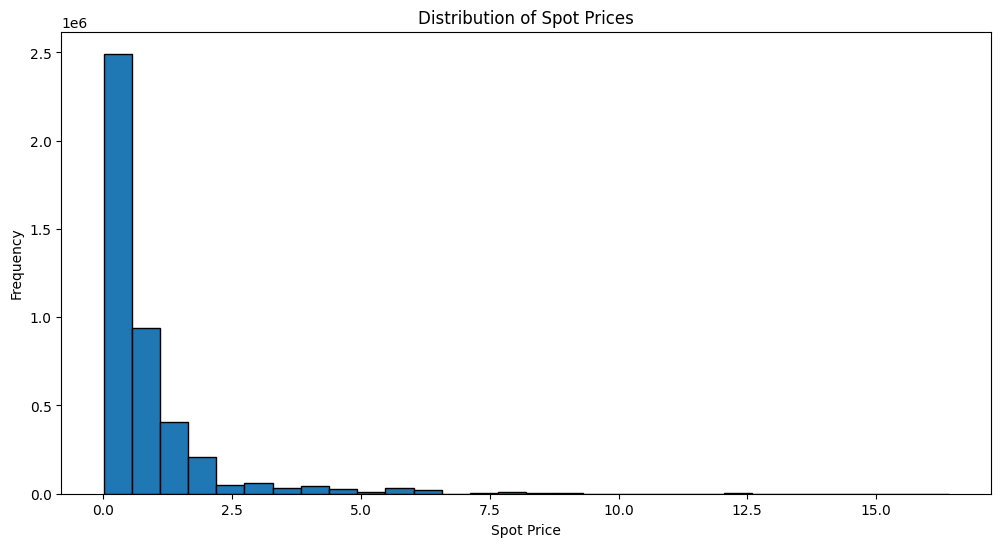

In [99]:
# Create a histogram to visualize the distribution of spot prices
plt.figure(figsize=(12, 6))
plt.hist(df['Spot Price'], bins=30, edgecolor='k')
plt.title("Distribution of Spot Prices")
plt.xlabel("Spot Price")
plt.ylabel("Frequency")
plt.show()


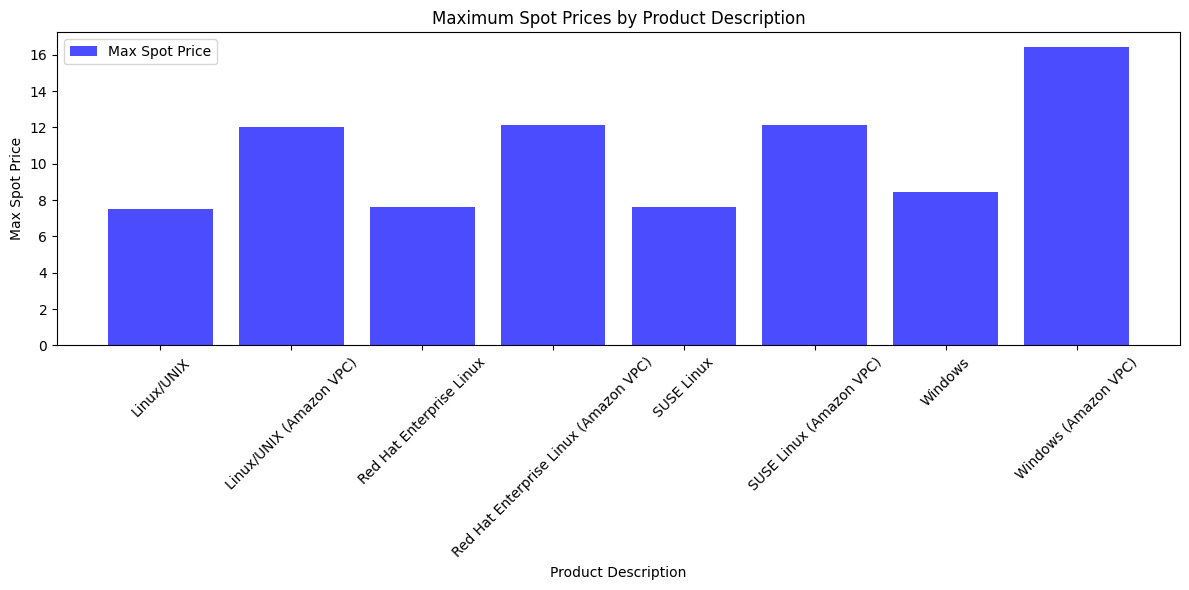

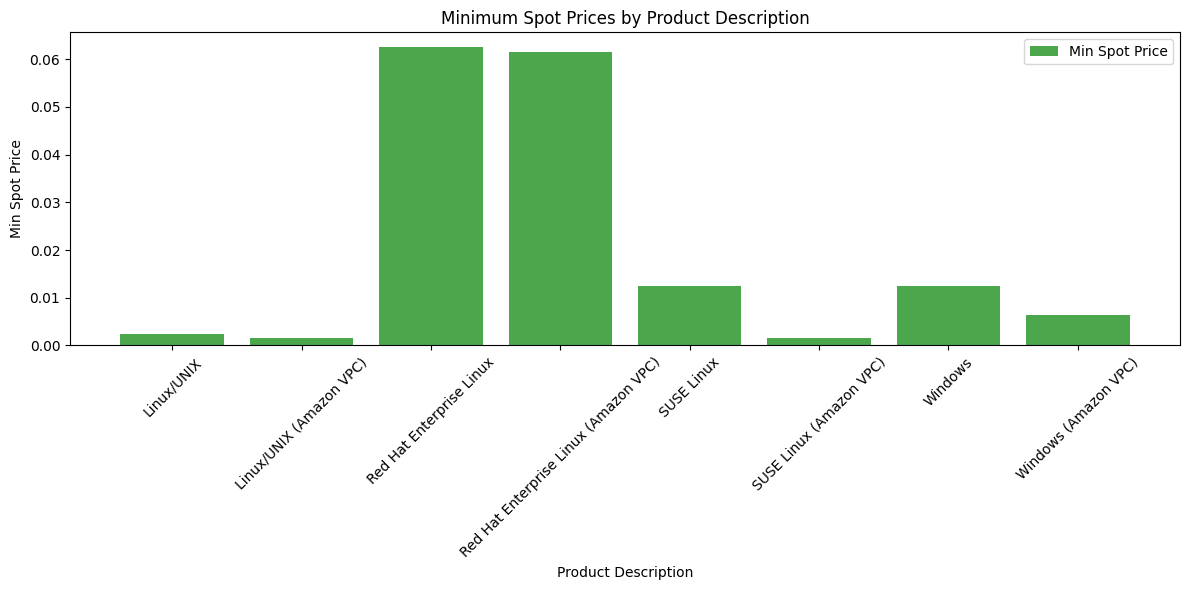

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Product Description': df['Product Description'],
    'Spot Price': df['Spot Price']
}

df_products = pd.DataFrame(data)

# Group by Product Description and calculate the maximum spot price for each product description
max_spot_price = df_products.groupby('Product Description')['Spot Price'].max().reset_index()

# Group by Product Description and calculate the minimum spot price for each product description
min_spot_price = df_products.groupby('Product Description')['Spot Price'].min().reset_index()

# Create a bar chart for maximum spot prices
plt.figure(figsize=(12, 6))
plt.bar(max_spot_price['Product Description'], max_spot_price['Spot Price'], label='Max Spot Price', alpha=0.7, color='blue')
plt.title("Maximum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Max Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()

# Create a bar chart for minimum spot prices
plt.figure(figsize=(12, 6))
plt.bar(min_spot_price['Product Description'], min_spot_price['Spot Price'], label='Min Spot Price', alpha=0.7, color='green')
plt.title("Minimum Spot Prices by Product Description")
plt.xlabel("Product Description")
plt.ylabel("Min Spot Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.legend()
plt.show()
